In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as mtick, pandas as pd, seaborn as sns, sklearn
from pandas import DataFrame, Series

%matplotlib inline

## Reading the Mushroom Data
The first step we needed to take in preprocessing is taking the mushroom data categories that we needed from the data file itself and then putting it into a dataframe with appropiate names for the column.

In [2]:
dfm = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", usecols = [0,5,22], names = ["poisonous","odor","habitat"])

In [3]:
dfm

,poisonous,odor,habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g
...,...,...,...
8119,e,n,l
8120,e,n,l
8121,e,n,l
8122,p,y,l


## Replacing Values
We now have a dataframe we need with all the important values, however they are not in a form that we can properly use with scikit. So what we need to do is replace these string values with integers that represent the categorical values.

In [4]:
dfm['poisonous'].replace({'e':0,'p':1},inplace=True)
dfm['odor'].replace({'a':0,'l':1,'c': 2,'y': 3,'f': 4,'m': 5,'n': 6, 'p': 7,'s': 8},inplace=True)
dfm['habitat'].replace({'g':0,'l':1,'m': 2,'p': 3,'u': 4,'w': 5,'d': 6},inplace=True)

In [5]:
dfm

,poisonous,odor,habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,1
8121,0,6,1
8122,1,3,1


## Exploratory Analysis

With the dataframe now in a usable form for scikit analysis we decide to analyze the preprocessed data we have using seaborn and make some hypothesis ourselves.

### Poisonous Bar Graph
We are able to see that there are less poisonous mushrooms than edible ones through this graph, although there isn't a huge difference.

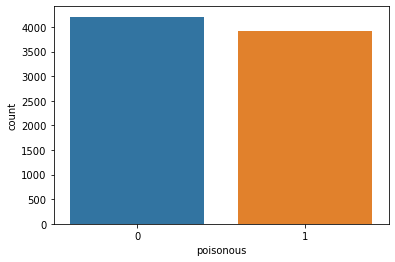

In [6]:
sns.countplot(x = 'poisonous', data = dfm)

### Odor Bar Graph
We are able to see the distribution of mushroom odors and it seems like no odor is far in the lead of odor counts with foul coming in second. The rest of the odors are far less common than these two.

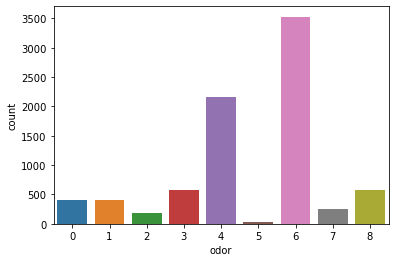

In [7]:
sns.countplot(x = 'odor', data = dfm)

### Habitat Bar Graph
We are able to see the distribution of mushroom habitats and wood mushrooms have the highest count with grass mushrooms in second and meadow mushrooms third. The distribution disparity is pretty wide but not as wide as the odor distribution.

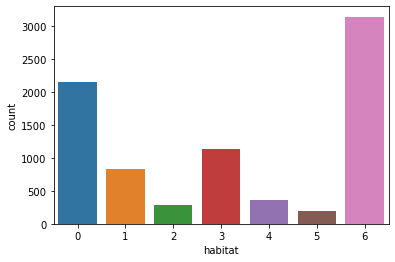

In [8]:
sns.countplot(x = 'habitat', data = dfm)

### Odor Against Toxicity Graph
As a bar graph felt far more fitting when working with all categorical data than a scatterplot, I used it to explore the correlation between the different odor types and the toxicity of a mushroom. There seems to be very strong correlation between the type of odor a mushroom has and its toxicity, for example no odor mushrooms are overwhelmingly edible while foul odor mushrooms are overwhelmingly poisonous.

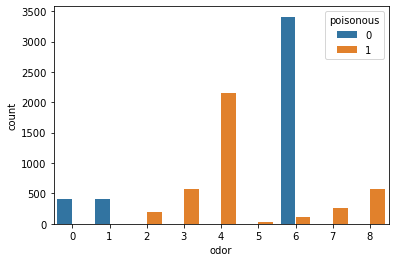

In [9]:
sns.countplot(x = 'odor',hue = 'poisonous', data = dfm)

### Habitat Against Toxicity Graph
There seems to be less correlation between habitat and type of mushroom but there still seems to be a relationship there with path mushrooms being much more poisonous than not so.

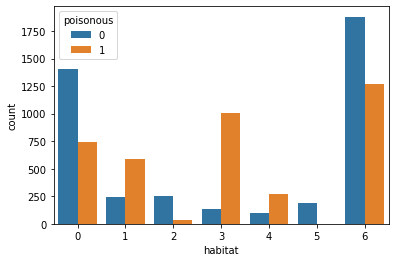

In [10]:
sns.countplot(x = 'habitat',hue = 'poisonous', data = dfm)

### Pairplot

These pairplots are more just to show how a scatterplot of purely categorical data doesn't turn out so well.

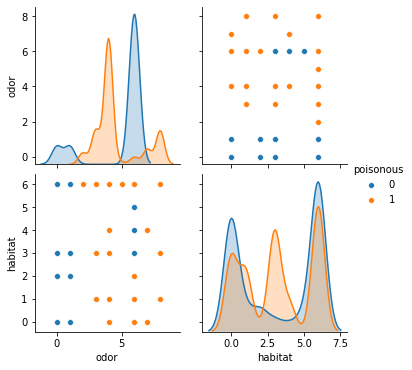

In [11]:
sns.pairplot(dfm, hue = 'poisonous')

## Conclusions
From the preliminary data exploration, I would definitely have to say that odor is a good indirect indicator of toxicity while habitat might be mildly helpful in some cases.